In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
llibres = pd.read_pickle('../data/llibres.pkl')
casos = pd.read_pickle('../data/casos.pkl')

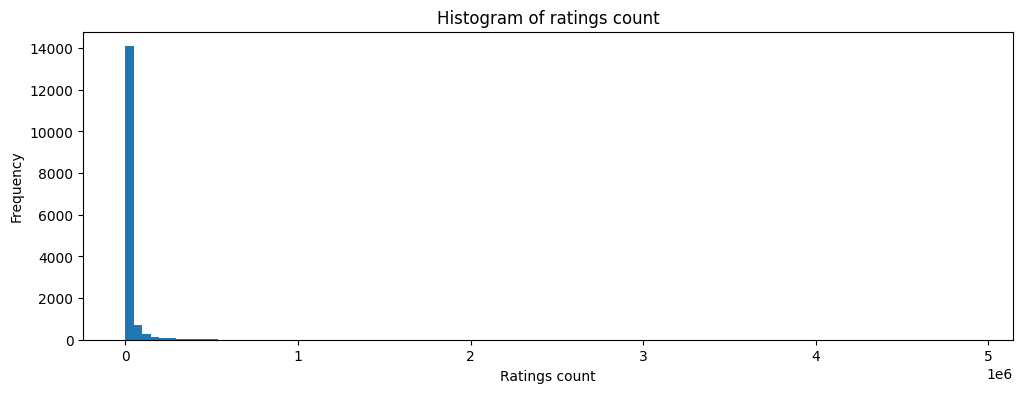

In [3]:
# Save hist of ratings_count
plt.figure(figsize=(12,4))
plt.hist(llibres['ratings_count'], bins=100)
plt.xlabel('Ratings count')
plt.ylabel('Frequency')
plt.title('Histogram of ratings count')
plt.savefig('hist_ratings_count.png')

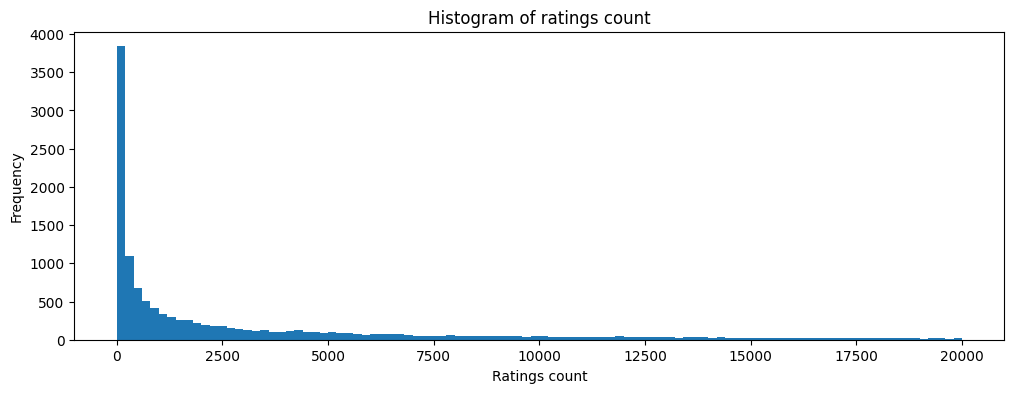

In [4]:
# Save hist of ratings_count limted to 20000
plt.figure(figsize=(12,4))
plt.hist(llibres['ratings_count'], bins=100, range=(0, 20000))
plt.xlabel('Ratings count')
plt.ylabel('Frequency')
plt.title('Histogram of ratings count')
plt.savefig('hist_ratings_count_limited_20000.png')

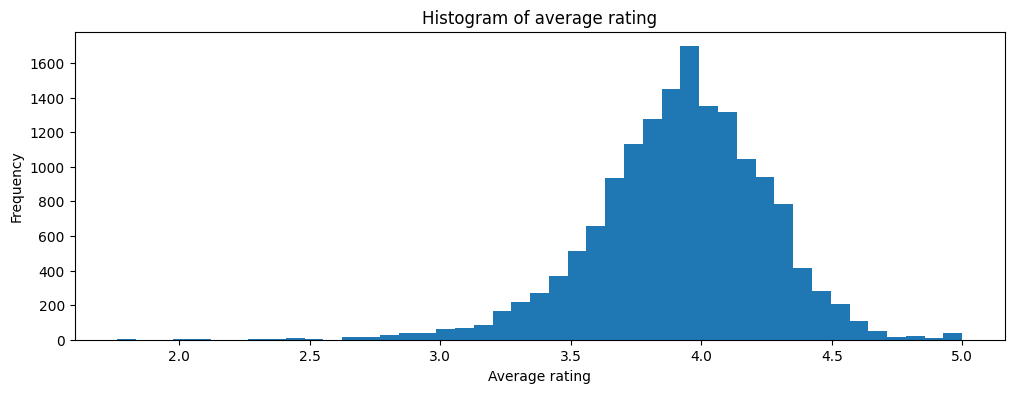

In [5]:
# Save hist average_rating
plt.figure(figsize=(12,4))
plt.hist(llibres['average_rating'], bins=45)
plt.xlabel('Average rating')
plt.ylabel('Frequency')
plt.title('Histogram of average rating')
plt.savefig('hist_average_rating.png')

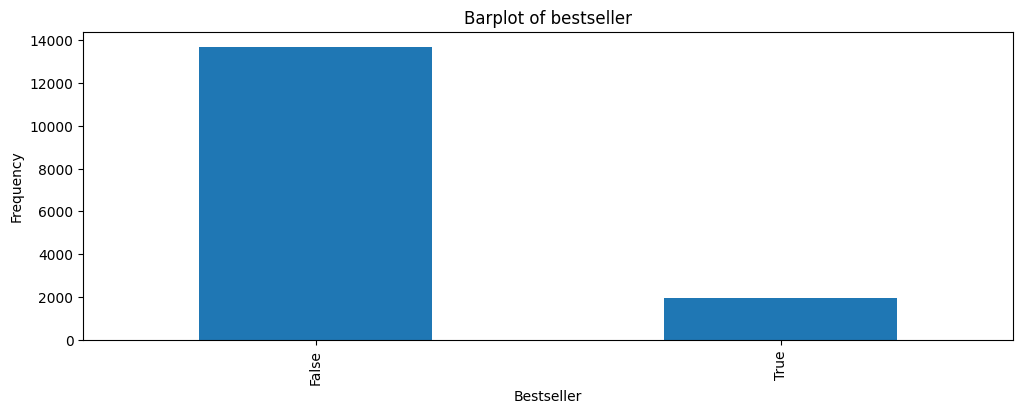

In [6]:
# Barplot bestseller or not
plt.figure(figsize=(12,4))
llibres['bestseller'].value_counts().plot(kind='bar')
plt.xlabel('Bestseller')
plt.ylabel('Frequency')
plt.title('Barplot of bestseller')
plt.savefig('barplot_bestseller.png')

In [7]:
# Get % of bestsellers
print(llibres['bestseller'].value_counts())
bestsellers = llibres['bestseller'].value_counts()
bestsellers = bestsellers/bestsellers.sum()*100
print()
print('Percentage of bestsellers: {:.2f}%'.format(bestsellers[1]))
print('Percentage of non-bestsellers: {:.2f}%'.format(bestsellers[0]))

bestseller
False    13703
True      1963
Name: count, dtype: int64

Percentage of bestsellers: 12.53%
Percentage of non-bestsellers: 87.47%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


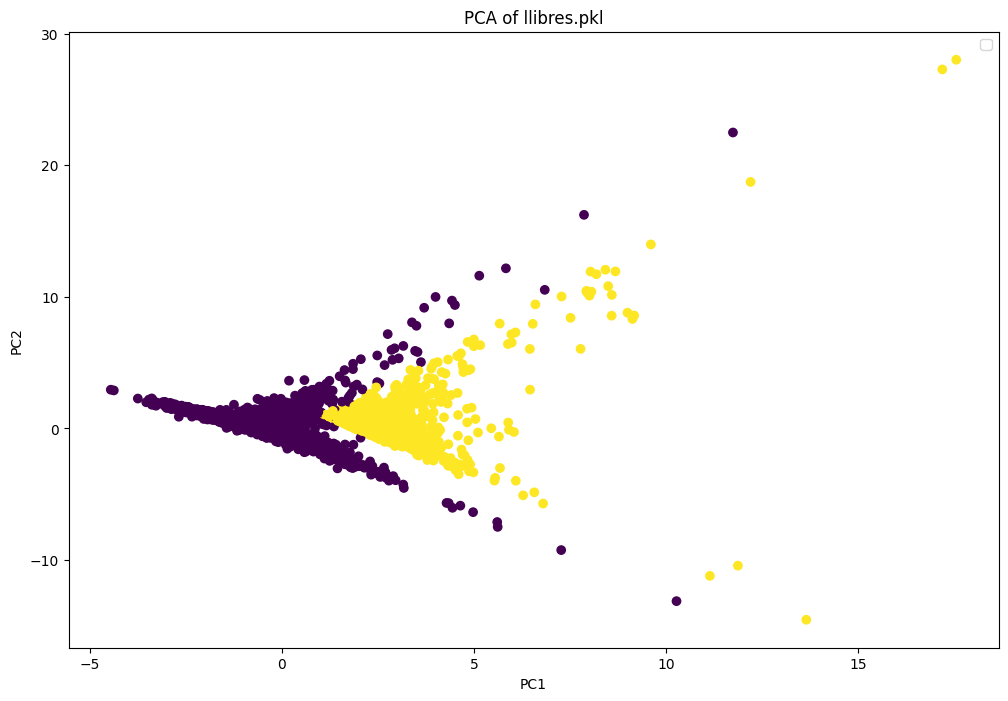

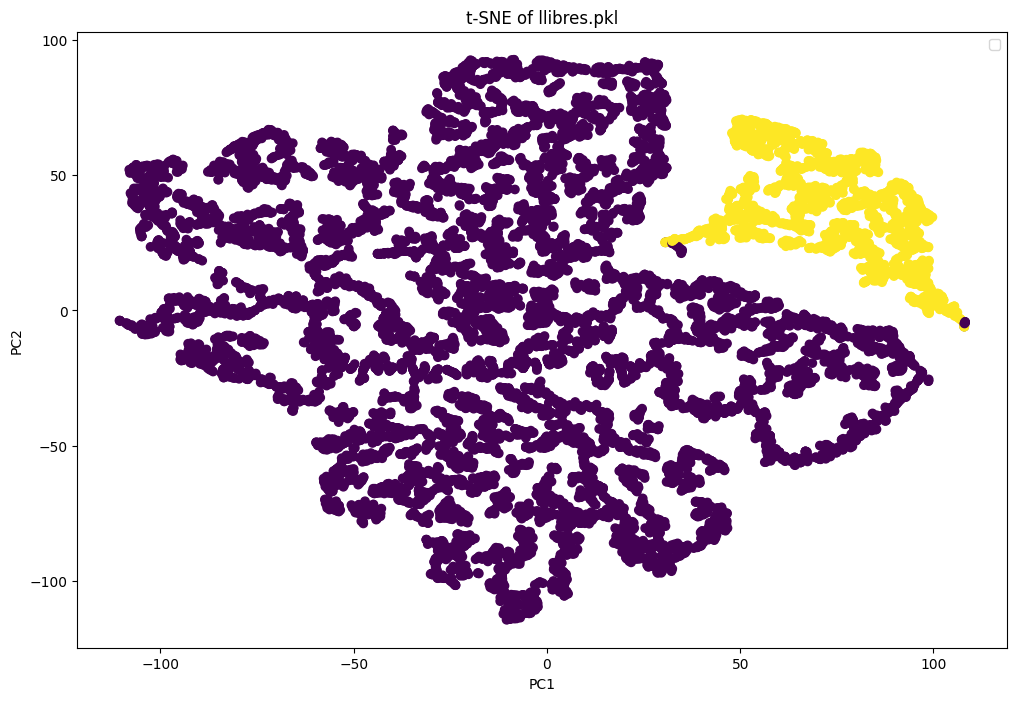

In [8]:
# Plot llibres.pkl cluster with a PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data
x = llibres[['ratings_count', 'average_rating', 'num_pages', 'bestseller']]
x = StandardScaler().fit_transform(x)

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
finalDf = pd.concat([principalDf, llibres[['bestseller']]], axis=1)

# Plot
plt.figure(figsize=(12,8))
plt.scatter(finalDf['PC1'], finalDf['PC2'], c=finalDf['bestseller'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of llibres.pkl')
plt.legend()
plt.savefig('pca_llibres.png')

# Plot llibres.pkl cluster with a t-SNE
from sklearn.manifold import TSNE

# t-SNE
tsne = TSNE(n_components=2)
tsneComponents = tsne.fit_transform(x)
tsneDf = pd.DataFrame(data=tsneComponents, columns=['PC1', 'PC2'])
tsneDf = pd.concat([tsneDf, llibres[['bestseller']]], axis=1)

# Plot
plt.figure(figsize=(12,8))
plt.scatter(tsneDf['PC1'], tsneDf['PC2'], c=tsneDf['bestseller'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('t-SNE of llibres.pkl')
plt.legend()
plt.savefig('tsne_llibres.png')

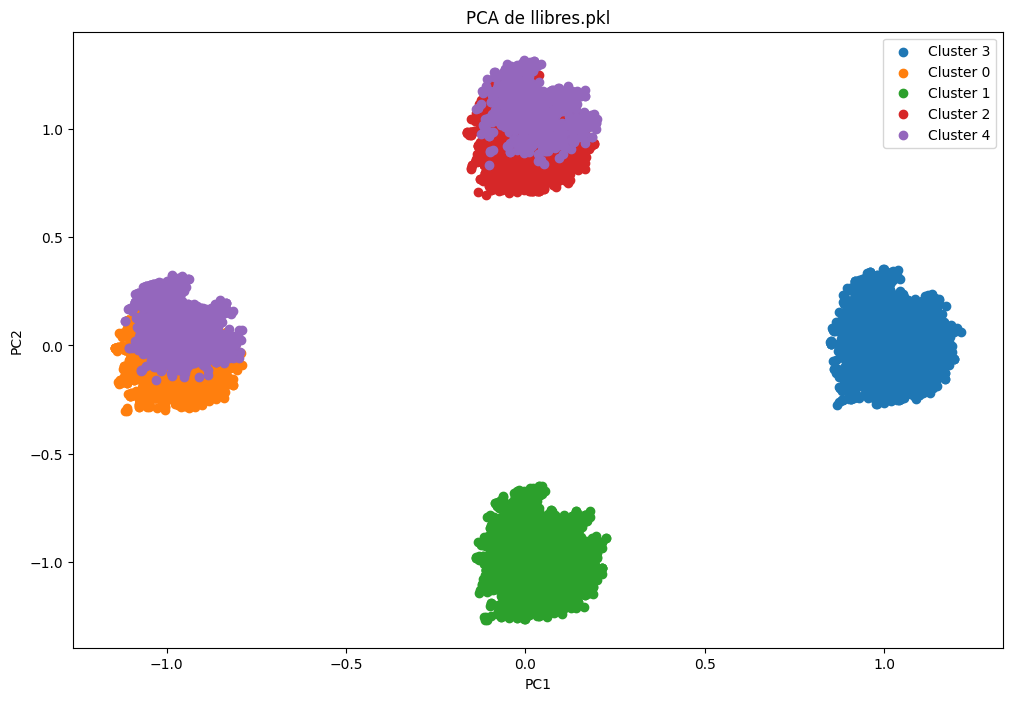

In [9]:
from sklearn.preprocessing import StandardScaler

# Suponiendo que 'llibres' es tu DataFrame original
# Convertir el vector en un DataFrame
df_vector = pd.DataFrame(llibres['vector'].tolist())

# Columna de clusters
df_cluster = pd.DataFrame(llibres['cluster'].tolist(), columns=['cluster'])

# Standardize data (opcional)
# df_vector = StandardScaler().fit_transform(df_vector)

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_vector)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Unir los componentes principales con la información del cluster
finalDf = pd.concat([principalDf, df_cluster], axis=1)

# Plot
plt.figure(figsize=(12,8))

# Crear un scatter plot para cada cluster
for cluster in finalDf['cluster'].unique():
    cluster_data = finalDf[finalDf['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA de llibres.pkl')

# Añadir leyenda
plt.legend()

# Guardar el gráfico
plt.savefig('pca_llibres_cluster.png')
plt.show()

In [10]:
!pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [11]:
df_vector = pd.DataFrame(llibres['vector'].tolist())

# Columna de clusters
df_cluster = pd.DataFrame(llibres['cluster'].tolist(), columns=['cluster'])

# PCA with 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_vector)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

# Unir los componentes principales con la información del cluster
finalDf = pd.concat([principalDf, df_cluster], axis=1)

# Plot a 3D interactive plot
import plotly.express as px
fig = px.scatter_3d(finalDf, x='PC1', y='PC2', z='PC3', color='cluster')

# Guardar el gráfico
fig.write_html('pca_llibres_cluster_3d.html')
fig.show()

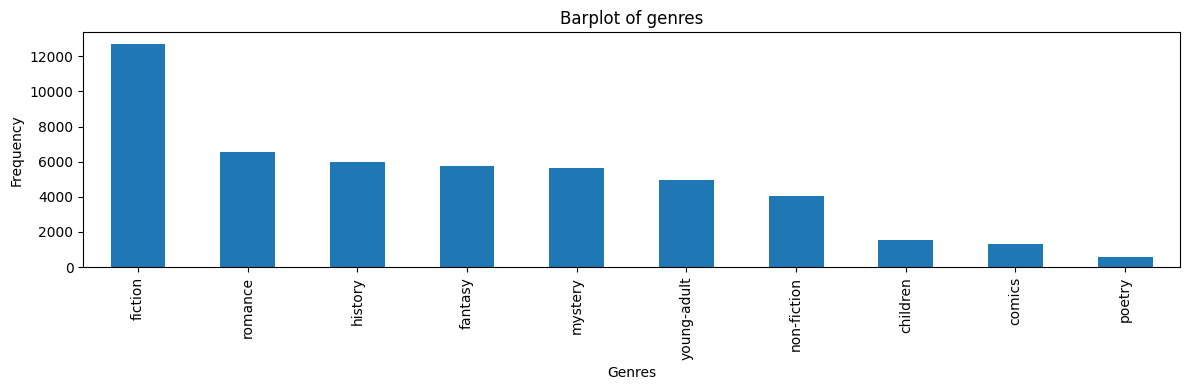

In [18]:
# Each row has multiple genres in a list, for example ['fantasy', 'fiction', 'young-adult']
# We need to split each row into multiple rows, one for each genre
# We will use the explode function
genres = llibres.explode('genres')
# Plot genres with a barplot
plt.figure(figsize=(12,4))
genres['genres'].value_counts().plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Barplot of genres')
# Save fig without cutting the labels
plt.tight_layout()
plt.savefig('barplot_genres.png')